# Neural Network using Single Perceptron
## Dividing the classes using straight line

### We will create a two class of data and seprate them with straight line using single perceptron neural network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from collections import Counter

equation of line that goes through origin $y=mx$
where $m$ is the slope or gradient

$m=y/x$

for simple example we assume that line has a slope of 1 and if any point is above line then it is in class 1 else in class 2

so for any new point with coordinates $(x',y')$

if $y'/x' = m$ then point is on line
if $y'/x' > m$ then point is above the line 
if $y'/x' < m$ then point is below the line 



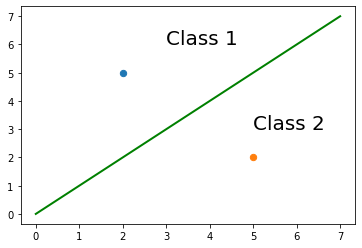

In [12]:
#assuing slope is 1. m=1
fig, ax = plt.subplots()
ax.scatter(2,5,s=40)
ax.text(3,6,"Class 1",fontsize=20)
ax.scatter(5,2,s=40)
ax.text(5,3,"Class 2",fontsize=20)
X = list(range(8))
ax.plot(X,X*1,lw=2,color='g')

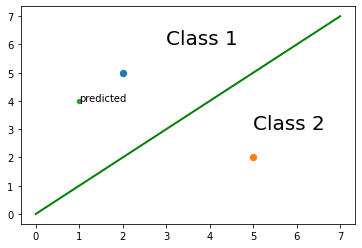

In [18]:
#generate any random point if point is below the line then it belongs to class 2 else class 1
x = random.randint(0,7)
y = random.randint(1,7)

fig, ax = plt.subplots()
ax.scatter(2,5,s=40)
ax.text(3,6,"Class 1",fontsize=20)
ax.scatter(5,2,s=40)
ax.text(5,3,"Class 2",fontsize=20)

ax.scatter(x,y,s=20)
ax.annotate("predicted",(x,y))
X = list(range(8))
ax.plot(X,X*1,lw=2,color='g')
    


### This was just a trivial example but now we will create two class of data and Nueral network to predict the line 

In [24]:
def generate_points_circle(radius=5,no_of_points=100,center=(0,0)):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((no_of_points,)))
    theta = 2 * np.random.random((no_of_points,)) * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x,y

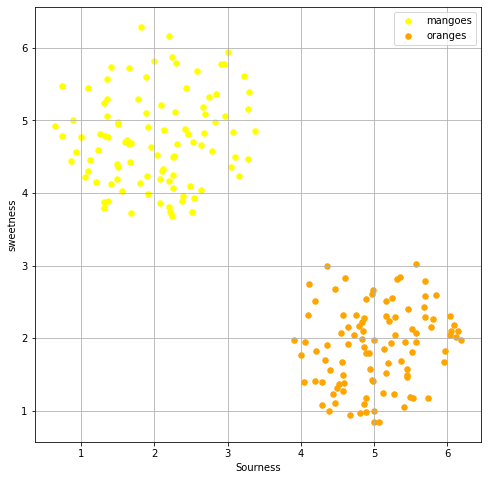

In [27]:
#generate two classes mangoes and oranges
# y axis represent sweetness and x axis represent sourness
fig, ax = plt.subplots(figsize=(8,8))

mangoes = generate_points_circle(1.4,100,(2,5))
oranges = generate_points_circle(1.2,100,(5,2))

ax.scatter(mangoes[0],mangoes[1],s=30,color="yellow",label="mangoes")
ax.scatter(oranges[0],oranges[1],s=30,color="orange",label="oranges")

ax.set_xlabel("Sourness")
ax.set_ylabel("sweetness")

ax.legend(loc="best")
ax.grid()
plt.show()



In [30]:
# calculates a dividing line by going through all the fruits 
# and dynamically adjusts the slope of the dividing line we want to calculate.
# creating dataset

from itertools import repeat
from random import shuffle

fruits = list( zip ( mangoes[0],
                    mangoes[1],
                    repeat(0,len(mangoes[1]))))

fruits+= list(zip (oranges[0],
                  oranges[1],
                  repeat(1, len(oranges[0]))))

len(fruits)

200

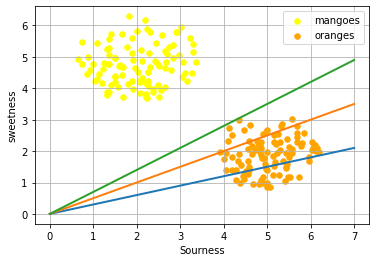

0.7


In [33]:
shuffle(fruits)
lr = 0.2 #learning_rate
count = 0
slope = 0.1
X = np.arange(0,8)

fig, ax = plt.subplots()

ax.scatter(mangoes[0],mangoes[1],s=30,color="yellow",label="mangoes")
ax.scatter(oranges[0],oranges[1],s=30,color="orange",label="oranges")

ax.set_xlabel("Sourness")
ax.set_ylabel("sweetness")

ax.legend(loc="best")
ax.grid()


for x, y, label in fruits:
    
    if y / x > slope and label == 1:
        slope += lr
        count +=1
        ax.plot(X, slope * X, 
                linewidth=2, label=str(count))
    elif y / x < slope and label == 0:
        slope -= lr
        count += 1
        ax.plot(X, slope * X,  
                linewidth=2, label=str(count))

plt.show()
print(slope)
        
    

In [39]:
#A simple Nueral Network

class Perceptron:
    """Perceptron class for NN """
    
    def __init__(self, weights=[0.1,0.1], lr=0.2):
        self.weights = np.array(weights)
        self.lr = lr
        
    @staticmethod
    def unit_step_fun(x):
        return 1 if x > 0 else 0
    
    def __call__(self,in_data):
        #in_data is input data 
        weight_in = self.weights * in_data
        return Perceptron.unit_step_fun(weight_in.sum())
    
    def adjust(self, target, calculated, in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)
            
        error = target - calculated
        
        if error:
            correction = error * in_data * self.lr
            self.weights += correction
    
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
        
    

In [35]:
data = list(zip(mangoes[0], mangoes[1])) + list(zip(oranges[0],oranges[1]))
target = [0]*len(mangoes[0]) + [1]*len(oranges[0])
len(data),data[0], len(target), target[0]

(200, (1.3317723280931868, 4.784440061270549), 200, 0)

In [36]:
train_x, test_x, train_y, test_y = train_test_split( data,
                                                    target,
                                                    train_size=0.8, test_size=0.2, random_state=42)


[('correct', 160)]
[('correct', 40)]
[ 1.25808183 -1.43468626]


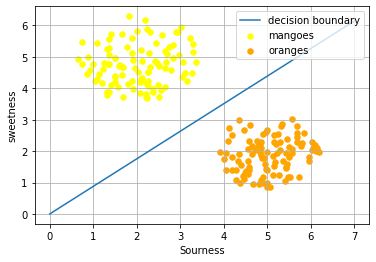

[ 1.25808183 -1.43468626]


In [40]:
fig, ax = plt.subplots()

ax.scatter(mangoes[0],mangoes[1],s=30,color="yellow",label="mangoes")
ax.scatter(oranges[0],oranges[1],s=30,color="orange",label="oranges")

ax.set_xlabel("Sourness")
ax.set_ylabel("sweetness")

ax.legend(loc="best")
ax.grid()

p = Perceptron(weights=[0.1, 0.1],
               lr=0.3)

for index in range(len(train_x)):
    p.adjust(train_y[index], 
             p(train_x[index]), 
             train_x[index])
    
evaluation = p.evaluate(train_x, train_y)
print(evaluation.most_common())
evaluation = p.evaluate(test_x, test_y)
print(evaluation.most_common())

print(p.weights)

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

How does the calculation work? We multiply the input values with the weights and get negative and positive values. Let us examine what we get, if the calculation results in 0:
$w1.x1+w2.x2 = 0$

$x2 = (-w1/w2). x1$
We can compare this with the general form of a straight line $y= m.x+c$

Algorithm works simple as if predicted label and ground truth is different then there is error -1 or +1 means either we have to decrease weeight because slope is more then req or need to incerease slope.

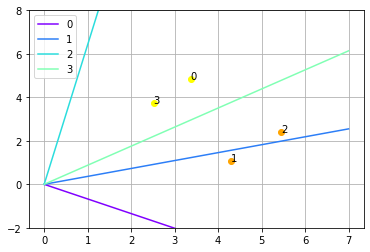

In [47]:
# Algorithm in motion 
# plotting the points that cause change in weights of network
import matplotlib.cm as cm

p = Perceptron(weights=[0.1, 0.1], lr=0.3)
no_of_colors = 7
colors = cm.rainbow(np.linspace(0, 1, no_of_colors))

fig, ax = plt.subplots()

ax.set_xticks(range(8))
ax.set_ylim([-2, 8])

counter = 0
for index in range(len(train_x)):
    old_weights = p.weights.copy()
    p.adjust(train_y[index], 
             p(train_x[index]), 
             train_x[index])
    if not np.array_equal(old_weights, p.weights):
        color = "yellow" if train_y[index] == 0 else "orange"        
        ax.scatter(train_x[index][0], 
                   train_x[index][1],
                   color=color)
        ax.annotate(str(counter), 
                    (train_x[index][0], train_x[index][1]))
        m = -p.weights[0] / p.weights[1]
        ax.plot(X, m * X, label=str(counter), color=colors[counter])
        counter += 1
ax.legend()
ax.grid()
plt.show()